In [1]:
print('importing libraries')
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
print('libraries imported')

importing libraries
libraries imported


In [5]:
# loading test and train data into pandas dataframe
train_dataf = pd.read_csv('Dataset/Train.csv')
test_dataf = pd.read_csv('Dataset/Test.csv')

In [6]:
#check for null
train_dataf.isna().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [7]:
test_dataf.isnull().sum()


Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [8]:
test_dataf[test_dataf['Gender'] == 'F']['Age'].median()


39.0

In [9]:
train_dataf[train_data['Gender'] == 'F']['Age'].median()

37.0

In [10]:
train_dataf['Work_Life_balance'].mode()

0    1.0
dtype: float64

In [11]:
test_dataf['Work_Life_balance'].mode()

0    1.0
dtype: float64

In [12]:
# filling the null values with eitger median/,ode
train_dataf['Age'].fillna(train_dataf['Age'].median(), inplace=True)
test_dataf['Age'].fillna(test_dataf['Age'].median(), inplace=True)

train_dataf['Time_of_service'].fillna(train_dataf['Time_of_service'].mode()[0], inplace=True)
test_dataf['Time_of_service'].fillna(test_dataf['Time_of_service'].mode()[0], inplace=True)

train_dataf['Pay_Scale'].fillna(train_dataf['Pay_Scale'].median(), inplace=True)
test_dataf['Pay_Scale'].fillna(test_dataf['Pay_Scale'].median(), inplace=True)

train_dataf['Work_Life_balance'].fillna(train_dataf['Work_Life_balance'].mode()[0], inplace=True)
test_dataf['Work_Life_balance'].fillna(test_dataf['Work_Life_balance'].mode()[0], inplace=True)

train_dataf['VAR2'].fillna(train_dataf['VAR2'].mode()[0], inplace=True)
test_dataf['VAR2'].fillna(test_dataf['VAR2'].mode()[0], inplace=True)

train_dataf['VAR4'].fillna(train_dataf['VAR4'].mode()[0], inplace=True)
test_dataf['VAR4'].fillna(test_dataf['VAR4'].mode()[0], inplace=True)

In [13]:
train_dataf.shape

(7000, 24)

In [14]:
train_dataf.isna().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [15]:
train_dataf.dtypes

Employee_ID                   object
Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
Attrition_rate               float64
dtype: object

In [16]:
train_dataf.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.468429,3.187857,13.233143,2.367143,47.064286,0.817857,2.798000,6.006286,2.385714,3.098571,0.054497,-0.013606,1.901286,2.834143,7.101286,3.257000,0.189376
std,13.214784,1.065102,10.310451,1.149395,15.761406,0.648205,1.163721,2.057112,1.123250,0.836377,0.970921,0.986933,0.504981,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,28.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,0.751600,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,51.000000,4.000000,20.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [17]:
#checking correlation among features
train_dataf.corr()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Age,1.000000,-0.005370,0.875748,0.140875,0.001430,0.011663,0.001360,0.012311,0.003275,0.004871,0.004750,0.007420,0.000357,0.000125,-0.001691,0.008218,-0.014760
Education_Level,-0.005370,1.000000,-0.012875,-0.002077,0.002991,-0.017690,0.009986,0.006830,-0.014715,-0.002185,-0.008234,-0.009689,0.004731,0.005444,0.009195,0.012909,-0.008143
Time_of_service,0.875748,-0.012875,1.000000,0.133354,-0.004731,0.002678,-0.001290,0.020376,-0.002955,0.004592,0.004344,0.006236,-0.004607,0.003700,0.006412,0.005610,-0.018318
Time_since_promotion,0.140875,-0.002077,0.133354,1.000000,0.014147,-0.012061,-0.008851,-0.008892,-0.007557,-0.002873,0.003068,-0.002783,-0.003029,0.000563,0.017264,0.005173,0.013880
growth_rate,0.001430,0.002991,-0.004731,0.014147,1.000000,0.008460,-0.006887,-0.004142,-0.017525,0.001351,0.008958,0.010991,0.020005,-0.015122,-0.005860,-0.017993,0.014247
Travel_Rate,0.011663,-0.017690,0.002678,-0.012061,0.008460,1.000000,0.021299,-0.011678,0.004668,0.023898,0.009556,-0.009019,-0.005177,-0.003866,-0.012280,-0.006271,-0.012608
Post_Level,0.001360,0.009986,-0.001290,-0.008851,-0.006887,0.021299,1.000000,0.022375,-0.014931,-0.008458,-0.009421,0.010387,-0.012055,0.013008,0.002765,-0.003397,0.016402
Pay_Scale,0.012311,0.006830,0.020376,-0.008892,-0.004142,-0.011678,0.022375,1.000000,-0.023186,0.011349,0.003849,0.003378,-0.010818,0.018071,-0.012316,0.002379,-0.015221
Work_Life_balance,0.003275,-0.014715,-0.002955,-0.007557,-0.017525,0.004668,-0.014931,-0.023186,1.000000,-0.021770,-0.000584,0.004295,-0.026315,0.021244,0.003882,0.023108,0.020975
VAR1,0.004871,-0.002185,0.004592,-0.002873,0.001351,0.023898,-0.008458,0.011349,-0.021770,1.000000,0.004018,-0.003318,0.001391,0.007904,-0.002771,0.009355,-0.008073


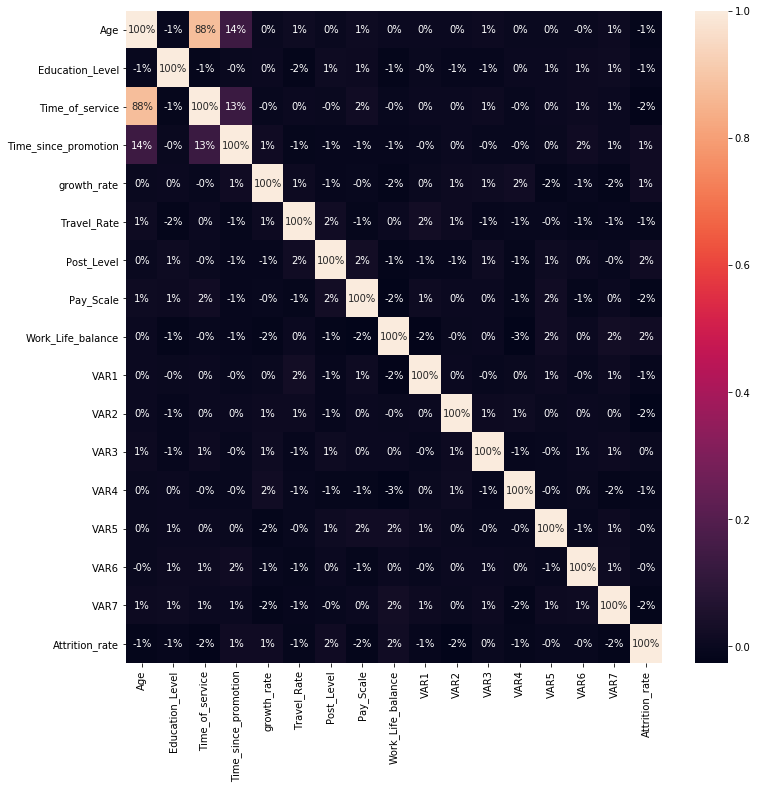

In [18]:
# visualizing cooreation using heatmap
plt.figure(figsize=(12,12))
sns.heatmap(train_dataf.corr(),annot=True,fmt='.0%')

In [19]:
# exploring the data
train_dataf.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [21]:
from scipy import stats
max(stats.zscore(train_dataf['Time_of_service']))

2.887262955308114

In [22]:

train_dataf['Time_of_service'].value_counts()

6.0     689
5.0     503
3.0     471
4.0     439
2.0     297
8.0     276
7.0     258
10.0    218
9.0     205
13.0    195
12.0    191
15.0    178
11.0    178
14.0    175
0.0     162
18.0    154
16.0    150
22.0    146
20.0    142
21.0    137
24.0    129
1.0     127
17.0    124
19.0    122
23.0    118
25.0    117
27.0    114
28.0    113
26.0    109
30.0     98
31.0     86
29.0     82
33.0     71
32.0     65
35.0     60
34.0     55
37.0     51
36.0     51
38.0     48
39.0     29
40.0     24
41.0     18
42.0     17
43.0      8
Name: Time_of_service, dtype: int64

In [23]:
test_dataf['Age'].value_counts()


38.0    207
22.0    112
27.0    105
52.0    100
26.0     95
30.0     95
37.0     94
54.0     92
45.0     90
60.0     89
25.0     85
42.0     84
35.0     83
28.0     83
32.0     81
24.0     79
47.0     77
21.0     71
31.0     65
19.0     62
65.0     61
23.0     60
59.0     58
50.0     55
20.0     54
41.0     49
58.0     48
56.0     46
53.0     45
57.0     44
43.0     44
48.0     43
40.0     42
34.0     41
33.0     41
55.0     41
49.0     40
29.0     39
51.0     39
44.0     38
39.0     37
46.0     34
36.0     32
62.0     32
63.0     30
64.0     30
61.0     28
Name: Age, dtype: int64

In [25]:
#transform non numerical into numerical
from sklearn.preprocessing import LabelEncoder

for column in train_dataf.columns:
    if train_dataf[column].dtype == np.number:
        continue
    else:
        train_dataf[column] = LabelEncoder().fit_transform(train_dataf[column])

In [26]:
train_dataf.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,4143,0,42.0,3,0,1,2,2,4.0,4,...,2,3.0,3,0.7516,1.8688,2.0,3,0,2,0.1841
1,2500,1,24.0,2,1,3,3,0,5.0,4,...,2,4.0,2,-0.9612,-0.4537,2.0,2,0,2,0.0670
2,5312,0,58.0,2,0,0,8,2,27.0,3,...,2,1.0,3,-0.9612,-0.4537,3.0,2,3,2,0.0851
3,2339,0,26.0,2,1,2,1,1,4.0,3,...,2,1.0,2,-1.8176,-0.4537,2.0,2,2,2,0.0668
4,3885,0,31.0,0,0,3,3,2,5.0,4,...,3,3.0,0,0.7516,-0.4537,2.0,1,3,1,0.1827


In [27]:
train_dataf.shape

(7000, 24)

In [28]:
#transform non numerical into numerical for test data 
for column in test_dataf.columns:
    if test_dataf[column].dtype == np.number:
        continue
    else:
        test_dataf[column] = LabelEncoder().fit_transform(test_dataf[column])

In [29]:
test_dataf.shape

(3000, 23)

In [30]:
train_dataf.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,4143,0,42.0,3,0,1,2,2,4.0,4,...,2,3.0,3,0.7516,1.8688,2.0,3,0,2,0.1841
1,2500,1,24.0,2,1,3,3,0,5.0,4,...,2,4.0,2,-0.9612,-0.4537,2.0,2,0,2,0.0670
2,5312,0,58.0,2,0,0,8,2,27.0,3,...,2,1.0,3,-0.9612,-0.4537,3.0,2,3,2,0.0851
3,2339,0,26.0,2,1,2,1,1,4.0,3,...,2,1.0,2,-1.8176,-0.4537,2.0,2,2,2,0.0668
4,3885,0,31.0,0,0,3,3,2,5.0,4,...,3,3.0,0,0.7516,-0.4537,2.0,1,3,1,0.1827


In [31]:
test_dataf.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,1702,0,32.0,4,1,3,9,2,7.0,4,...,4.0,2,1.0,2,-0.9612,-0.4537,2.0,0,3,3
1,2958,1,65.0,1,1,2,2,3,41.0,2,...,1.0,2,1.0,3,-0.9612,0.7075,1.0,1,3,1
2,1628,1,52.0,2,0,3,10,3,21.0,3,...,8.0,3,1.0,3,-0.1048,0.7075,2.0,0,4,2
3,2709,1,50.0,4,1,4,4,0,11.0,4,...,2.0,0,4.0,2,-0.1048,0.7075,2.0,1,3,2
4,2580,0,44.0,2,0,1,9,2,12.0,4,...,2.0,2,4.0,3,1.6081,0.7075,2.0,1,2,3


In [32]:
# normalizing the data
#tarin data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_dataf['Time_of_service'] = pd.DataFrame(scaler.fit_transform(train_dataf[['Time_of_service']]))
train_dataf['Time_since_promotion'] = pd.DataFrame(scaler.fit_transform(train_dataf[['Time_since_promotion']]))
train_dataf['growth_rate'] = pd.DataFrame(scaler.fit_transform(train_dataf[['growth_rate']]))
train_dataf['Age'] = pd.DataFrame(scaler.fit_transform(train_dataf[['Age']]))

# test data
test_dataf['Time_of_service'] = pd.DataFrame(scaler.fit_transform(test_dataf[['Time_of_service']]))
test_dataf['Time_since_promotion'] = pd.DataFrame(scaler.fit_transform(test_dataf[['Time_since_promotion']]))
test_dataf['growth_rate'] = pd.DataFrame(scaler.fit_transform(test_dataf[['growth_rate']]))
test_dataf['Age'] = pd.DataFrame(scaler.fit_transform(test_dataf[['Age']]))

In [33]:
train_dataf.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,4143,0,0.500000,3,0,1,2,2,0.093023,1.00,...,2,3.0,3,0.7516,1.8688,2.0,3,0,2,0.1841
1,2500,1,0.108696,2,1,3,3,0,0.116279,1.00,...,2,4.0,2,-0.9612,-0.4537,2.0,2,0,2,0.0670
2,5312,0,0.847826,2,0,0,8,2,0.627907,0.75,...,2,1.0,3,-0.9612,-0.4537,3.0,2,3,2,0.0851
3,2339,0,0.152174,2,1,2,1,1,0.093023,0.75,...,2,1.0,2,-1.8176,-0.4537,2.0,2,2,2,0.0668
4,3885,0,0.260870,0,0,3,3,2,0.116279,1.00,...,3,3.0,0,0.7516,-0.4537,2.0,1,3,1,0.1827


In [34]:
test_dataf.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,1702,0,0.282609,4,1,3,9,2,0.162791,1.00,...,4.0,2,1.0,2,-0.9612,-0.4537,2.0,0,3,3
1,2958,1,1.000000,1,1,2,2,3,0.953488,0.50,...,1.0,2,1.0,3,-0.9612,0.7075,1.0,1,3,1
2,1628,1,0.717391,2,0,3,10,3,0.488372,0.75,...,8.0,3,1.0,3,-0.1048,0.7075,2.0,0,4,2
3,2709,1,0.673913,4,1,4,4,0,0.255814,1.00,...,2.0,0,4.0,2,-0.1048,0.7075,2.0,1,3,2
4,2580,0,0.543478,2,0,1,9,2,0.279070,1.00,...,2.0,2,4.0,3,1.6081,0.7075,2.0,1,2,3


In [35]:
# getting rid of extra features which does not help towards prediction
test_dataf = test_dataf.drop(['Employee_ID','Hometown'], axis=1)
train_dataf = train_dataf.drop(['Employee_ID','Hometown'], axis=1)


In [36]:
train_dataf.shape

(7000, 22)

In [37]:
test_dataf.shape

(3000, 21)

In [38]:
# training data split
x_train = train_dataf.drop(['Attrition_rate'], axis=1) # feature
y_train = train_dataf['Attrition_rate']  # label/target

In [39]:
x_train.shape

(7000, 21)

In [40]:
y_train.shape

(7000,)

In [42]:
x_test = test_dataf
x_test.shape

(3000, 21)

In [43]:
# model

import xgboost
regressor=xgboost.XGBRegressor()

In [44]:
# parameter tuning
n_estimators = [500, 700, 900, 1100, 1300]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree','gblinear']
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1,2,3,4]
base_score = [0.25,0.5,0.75,1]

In [45]:
hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'learning_rate' : learning_rate,
    'min_child_weight' : min_child_weight,
    'booster' : booster,
    'base_score' : base_score
}

In [46]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [47]:
hyperparameter_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [48]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=3, n_iter=100,
            scoring = 'neg_mean_absolute_error',n_jobs = -1,
            verbose = 2, 
            return_train_score = True,
            random_state=42)

In [49]:
random_cv.fit(x_train,y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 20.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [53]:
random_cv.best_estimator_


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=1400,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [54]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=4, missing=None, n_estimators=1100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [56]:
regressor.fit(x_train,y_train)


[11:11:59] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[11:11:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, max_delta_step, max_depth, min_child_weight, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:12:00] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=None, monotone_constraints=None,
             n_estimators=1100, n_jobs=1, nthread=1, num_parallel_tree=None,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=0, silent=None, subsample=1,
             tree_method=None, validate_parameters=1, verbosity=1)

In [57]:
y_pred = regressor.predict(x_test)

In [58]:
y_pred.shape


(3000,)

In [62]:
# 

predection = pd.DataFrame(y_pred)
submission_df = pd.read_csv('Dataset/Test.csv')
datasets = pd.concat([submission_df['Employee_ID'],predection], axis=1)
datasets.columns = ['Employee_ID', 'Attrition_rate']
datasets.to_csv('submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [63]:

sub_dataf = pd.read_csv('submission.csv')

In [64]:
sub_dataf.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.198844
1,EID_9658,0.196167
2,EID_22203,0.190931
3,EID_7652,0.197264
4,EID_6516,0.198433
